In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib qt5
#
#  extend path by location of the dvr package
#
sys.path.append('/home/thomas/Python')
import dvr

In [6]:
amu_to_au=1822.888486192
au2cm=219474.63068
au2eV=27.211386027
Angs2Bohr=1.8897259886

In [8]:
#
#  default potential has a resonance just below 7 eV
#
def Jolanta(x, a=0.2, b=0.0, c=0.14):
    return (a*x*x-b)*np.exp(-c*x*x)

In [9]:
#
#  compute DVR of T and V
#  then show the density of states
#  in a potential + energy-levels plot
#
xmax=20      # grid from -xmax to xmax
thresh = 1   # maximum energy for plot
ppB = 10     # grid points per Bohr

xmin=-xmax
nGrid=int((xmax-xmin)*ppB)
xs = dvr.DVRGrid(xmin, xmax, nGrid)
Vs = Jolanta(xs)
Ts = dvr.KineticEnergy(1, xmin, xmax, nGrid)
Vs=Jolanta(xs)
[energy, wf] = dvr.DVRDiag2(nGrid, Ts, Vs)

n_ene=0
for i in range(nGrid):
    print("%3d  %12.8f au = %12.5f eV" % (i+1, energy[i], energy[i]*au2eV))
    n_ene += 1
    if energy[i] > thresh:
        break

# "DVR normalization", sum(wf[:,0]**2)
# this is correct for plotting

c=["orange", "blue"]
h=float(xmax) / (nGrid+1.0)
scale=3

plt.plot(xs,Vs*au2eV, '-', color="black")
for i in range(n_ene):
    plt.plot(xs, scale*wf[:,i]**2+energy[i]*au2eV, '-', color=c[i%len(c)])
plt.ylim(0, 20)
plt.xlabel('$x$ [Bohr]')
plt.ylabel('$E$ [eV]')
plt.show()

  1    0.02022873 au =      0.55045 eV
  2    0.02023240 au =      0.55055 eV
  3    0.07953495 au =      2.16426 eV
  4    0.07957183 au =      2.16526 eV
  5    0.17374559 au =      4.72786 eV
  6    0.17423234 au =      4.74110 eV
  7    0.25134114 au =      6.83934 eV
  8    0.29832436 au =      8.11782 eV
  9    0.30362777 au =      8.26213 eV
 10    0.44165015 au =     12.01791 eV
 11    0.45174551 au =     12.29262 eV
 12    0.57822676 au =     15.73435 eV
 13    0.61891287 au =     16.84148 eV
 14    0.70442189 au =     19.16830 eV
 15    0.79792077 au =     21.71253 eV
 16    0.87792666 au =     23.88960 eV
 17    0.99084369 au =     26.96223 eV
 18    1.08851490 au =     29.62000 eV


In [19]:
#
#  Stabilization calculation: 
#
#  put the system into a box, change the box length 
#  our box length = 2L: from -L to L
#

L_min=10       # smallest grid extent (box size)
L_max=24       # largest grid extent (box size)
nEs_keep=30    # how many energies are kept


n_L=141 # ~ (L_max - L_min)/stepsize + 1  with stepsize = 0.1 Bohr


L=np.linspace(L_min, L_max, num=n_L, endpoint=True)

run_data = np.zeros((n_L,nEs_keep))  # array used to collect all eta-run data

for iL in range(n_L):
    xmax=L[iL]
    xmin=-xmax
    nGrid=int((xmax-xmin)*ppB)
    xs = dvr.DVRGrid(xmin, xmax, nGrid)
    Vs = Jolanta(xs)
    Ts = dvr.KineticEnergy(1, xmin, xmax, nGrid)
    Vs=Jolanta(xs)
    [energy, wf] = dvr.DVRDiag2(nGrid, Ts, Vs)
    run_data[iL,:] = energy[0:nEs_keep]
    print(iL+1, end=" ")
    if (iL+1)%10==0:
        print()

run_data *= au2eV

1 2 3 4 5 6 7 8 9 10 
11 12 13 14 15 16 17 18 19 20 
21 22 23 24 25 26 27 28 29 30 
31 32 33 34 35 36 37 38 39 40 
41 42 43 44 45 46 47 48 49 50 
51 52 53 54 55 56 57 58 59 60 
61 62 63 64 65 66 67 68 69 70 
71 72 73 74 75 76 77 78 79 80 
81 82 83 84 85 86 87 88 89 90 
91 92 93 94 95 96 97 98 99 100 
101 102 103 104 105 106 107 108 109 110 
111 112 113 114 115 116 117 118 119 120 
121 122 123 124 125 126 127 128 129 130 
131 132 133 134 135 136 137 138 139 140 
141 

(0, 20)

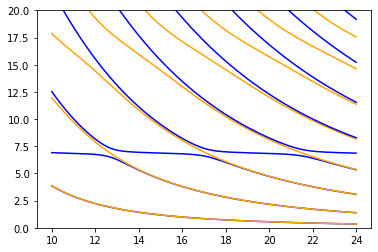

In [29]:
#
# even states in blue, odd states in yellow
#
for i in range(0, nEs_keep, 2):
    plt.plot(L,run_data[:,i], '-', color='blue')
    plt.plot(L,run_data[:,i+1], '-', color="orange")
plt.ylim(0,20)

(0, 20)

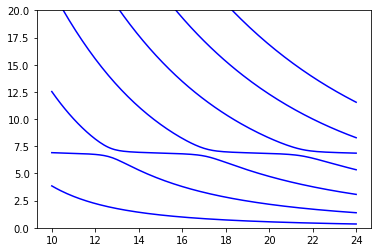

In [34]:
#
# copy the 7 lowest even states from run_data to stab_data
#
nEs=7
stab_data = np.zeros((n_L,nEs))
i = 0
for i in range(nEs):
    stab_data[:,i] = run_data[:,2*i]

for i in range(nEs):
    plt.plot(L,stab_data[:,i], '-', color='blue')
plt.ylim(0,20)

In [10]:
#
# You have to hand-select the L-ranges for your choice of a, b, c,
# and grid parameters
#
# I suggest you put the crossing_j.dat files into a directory 
# with a useful name
#

TypeError: savetxt() got multiple values for argument 'fmt'

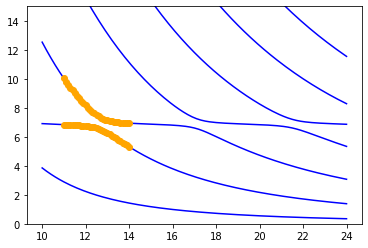

In [52]:
#
fn="crossing_1.dat"
#
Lmin=11
Lmax=14
i=1
j=2
idx_min = np.searchsorted(L, Lmin, side="left")
idx_max = np.searchsorted(L, Lmax, side="right")
nL = idx_max - idx_min
crossing = np.zeros((nL,3))
crossing[:,0] = L[idx_min:idx_max]
crossing[:,1] = stab_data[idx_min:idx_max,i]
crossing[:,2] = stab_data[idx_min:idx_max,j]
for i in range(nEs):
    plt.plot(L,stab_data[:,i], '-', color='blue')
plt.ylim(0,15)
plt.plot(crossing[:,0], crossing[:,1], 'o-', color="orange")
plt.plot(crossing[:,0], crossing[:,2], 'o-', color="orange")
np.savetxt(fn, "crossing_1.dat", crossing, fmt='%15.12f', delimiter=' ', header='  L E1 E2', comments='')

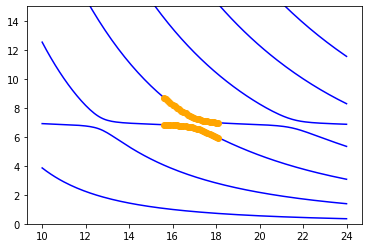

In [53]:
#
fn="crossing_2.dat"
#
Lmin=15.6
Lmax=18.2
i=2
j=3
idx_min = np.searchsorted(L, Lmin, side="left")
idx_max = np.searchsorted(L, Lmax, side="right")
nL = idx_max - idx_min
crossing = np.zeros((nL,3))
crossing[:,0] = L[idx_min:idx_max]
crossing[:,1] = stab_data[idx_min:idx_max,i]
crossing[:,2] = stab_data[idx_min:idx_max,j]
for i in range(nEs):
    plt.plot(L,stab_data[:,i], '-', color='blue')
plt.ylim(0,15)
plt.plot(crossing[:,0], crossing[:,1], 'o-', color="orange")
plt.plot(crossing[:,0], crossing[:,2], 'o-', color="orange")
np.savetxt(fn, crossing, fmt='%15.12f', delimiter=' ', header='  L E1 E2', comments='')

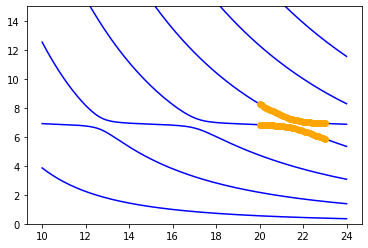

In [54]:
#
fn="crossing_3.dat"
#
Lmin=20
Lmax=23
i=3
j=4
idx_min = np.searchsorted(L, Lmin, side="left")
idx_max = np.searchsorted(L, Lmax, side="right")
nL = idx_max - idx_min
crossing = np.zeros((nL,3))
crossing[:,0] = L[idx_min:idx_max]
crossing[:,1] = stab_data[idx_min:idx_max,i]
crossing[:,2] = stab_data[idx_min:idx_max,j]
for i in range(nEs):
    plt.plot(L,stab_data[:,i], '-', color='blue')
plt.ylim(0,15)
plt.plot(crossing[:,0], crossing[:,1], 'o-', color="orange")
plt.plot(crossing[:,0], crossing[:,2], 'o-', color="orange")
np.savetxt(fn, crossing, fmt='%15.12f', delimiter=' ', header='  L E1 E2', comments='')